# Закономерности, определяющие успешность игры

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xboxили PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


    ● Name — название игры
    ● Platform — платформа
    ● Year_of_Release — год выпуска
    ● Genre — жанр игры
    ● NA_sales — продажи в Северной Америке (миллионы проданных копий)
    ● EU_sales — продажи в Европе (миллионы проданных копий)
    ● JP_sales — продажи в Японии (миллионы проданных копий)
    ● Other_sales — продажи в других странах (миллионы проданных копий)
    ● Critic_Score — оценка критиков (максимум 100)
    ● User_Score — оценка пользователей (максимум 10)
    ● Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


На первый вгляд заметны ошибки в название столбцов (не приведенны к нижнему регистру), год имеет тип float

## Предобработка данных

In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### Обработка столбца 'name', 'genre' и  'year_of_release'

Начнём с избавления пропусков в столбце 'name' и 'genre', скорее всего потеря данных произошла в этих слобцах по случайности, так как их небольшое количество

In [6]:
data[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


269 строк без года, так как дальше нужно будет делать анализ рынка по годам, то удалим эти строки

In [8]:
data.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

### Обработка столбца 'rating' , 'user_score' и 'critic_score'

Пропуски в 'rating' появились из-за того, что, возможно, во времена некоторых игр не было системы рейтингов, она уже устаревшая или используется другая система рейтингов. Также есть вероятность, что пропуски связаны с опред. регионом, но на сто процентов утвержать нельзя

Пропуски в 'rating' заполним на RP (рейтинг в ожидании)

In [9]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
data['rating'] = data['rating'].fillna('RP')

In [11]:
data['rating'].value_counts()

RP      6677
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

Рейтинги, которые есть в нашей таблице:

    ● рейтинг в ожидании (RP)
    ● все (E)
    ● все 10+ (E10+)
    ● подросток (Т)
    ● зрелые 17+ (М)
    ● только для взрослых 18+ (АО)

Что тогда за рейтинги EC и K-A? ЕС - это раннее детство, не используется с 2018 года, K-A - это для детей, позже в 1998 году был переименован в Е – для всех возрастов, а потом разделили на два E и E10+

Так как EC, K-A и AO, либо очень мало, либо они уже не используются, то заменим их схожими рейтингами

А пропуски заполним с помощью словаря

In [12]:
rename = {
    'EC': 'E',
    'K-A': 'E10+',  
    'AO': 'M'}
data['rating'] = data['rating'].replace(rename)

В оценке пользователей есть tbd (To Be Determined - "Будет определено"), то есть на текущий момент оценка отсутствует заменим его на 0

Тут ('user_score' и 'critic_score') могли произойти пропуски из-за того, что просто не записывались оценки пользователей/оценки критиков или не практиковали их в то время

In [13]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0
data['user_score'] = data['user_score'].fillna(0)

In [15]:
data['critic_score'] = data['critic_score'].fillna(0)

### Изменение типов данных в столбцах 'critic_score', 'year_of_release' и 'user_score'

Года и оценки критиков не могут быть половинчатами, поэтому изменим тип на int64, а оценка пользователей должна быть не целочисленной, поэтому изменим на float64

In [16]:
data['year_of_release'] = data['year_of_release'].astype('int64')
data['critic_score'] = data['critic_score'].astype('int64')
data['user_score'] = data['user_score'].astype('float64')

### Поиск неявных дубликатов в 'name' и 'platform'

Один из Madden NFL 13 выглядит "пустым", там всего 0.01 продаж в Европе и только в ней, от него стоит избавиться, также поступим и с Need for Speed: Most Wanted на PC, который тоже продавался только в Европе

А вот Need for Speed: Most Wanted на X360 трогать не будем, так как данные о продажах там разные и возможно игра и правда выпускалась и в 2005, и в 2012, даже в интернете данные немного разные где-то говорят что на X360 выпустили в 2012-2013, а где-то в 2005

In [17]:
data[data.duplicated(subset=['name','platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E


In [18]:
data.drop([11715, 16230], axis=0, inplace=True)

### Суммарные продажи во всех регионах

In [19]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,RP,31.38


## Исследовательский анализ данных

### Выпуск игр по годам

In [20]:
years_game = data.groupby('year_of_release',as_index=False)['platform'].count()
years_game.columns = ['year','count']

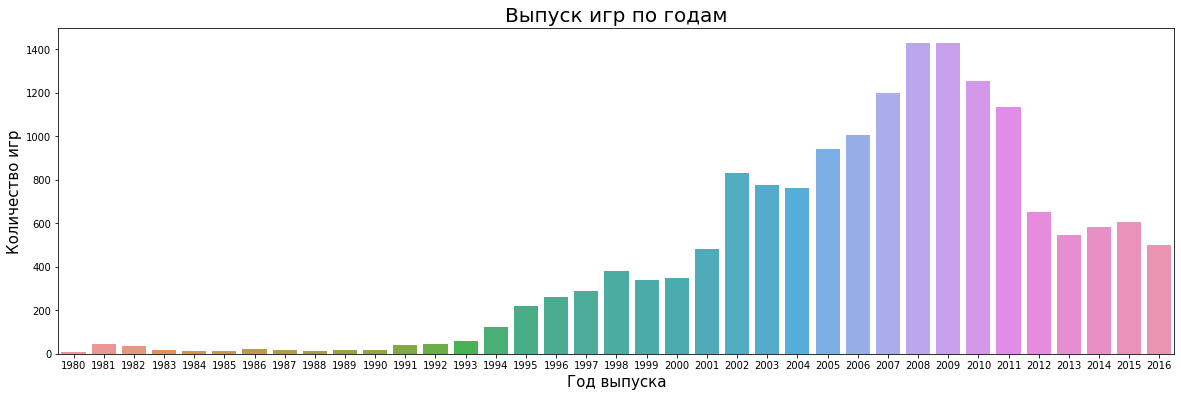

In [21]:
fig, ax = plt.subplots(figsize=(20, 6))

ax = sns.barplot(x='year', y='count', data=years_game)

plt.title('Выпуск игр по годам',fontsize = 20)
plt.xlabel('Год выпуска',fontsize = 15)
plt.ylabel('Количество игр',fontsize = 15);

Постепенный рост продаж с 1998 года можно объяснить тем, что технический прогресс не стоит на месте и с каждым годом приставки станавились доступнее для людей и более технологичнее (это позволяло делать более интересные игры), что провацировало ажиотаж со стороны покупателя. Но спустя 14 лет ползователь насытился этими новвоведдениями и играми, они ему начали наскучивать, да и поиграть можно на смартфоне (их развитие также одна из причин снижения) и ПК, порой не покупая дорогие диски или подписки)

Пик продаж приходится на 2008 и 2009 годы, потом в 2012 происходит резкое падение почти в 2 раза и дальше продажи идут на спад

### Продажи по платформам

Возьмём платформы с продажами больше 75 квартиля и построим по ним тепловую карту

In [22]:
platform_top = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
                .query('total_sales > total_sales.quantile(0.75)').sort_values(by='total_sales',ascending=False)
top = list(platform_top.index)
platform_top

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88


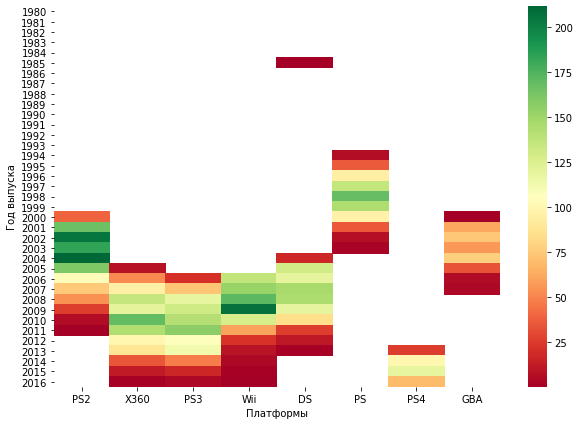

In [23]:
platform_sale = data.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum')
platform_top_sale = platform_sale.loc[:, top]


plt.figure(figsize = (10,7))
ax = sns.heatmap(platform_top_sale, cmap='RdYlGn')
ax.set(xlabel="Платформы", ylabel="Год выпуска");

Наблюдается старт, рост, пик, падение продаж и закрытие платформы. С начала жизни игровой индустрии доминировали продукты SONY. После 2005 года подтянулись Nintendo и Microsoft. Для сохранения интереса пользователей к своим продуктам производители обновляли свои игровые платформы создавая цепочку их развития, как например "PS-PS2-PS3-PS4"

В период 1995-2000 годы максимум продавалась платформа PS, 2000-2005 - PS2 и 2005-2010 - Wii

Примем за актуальный период 2013-2016 годы.

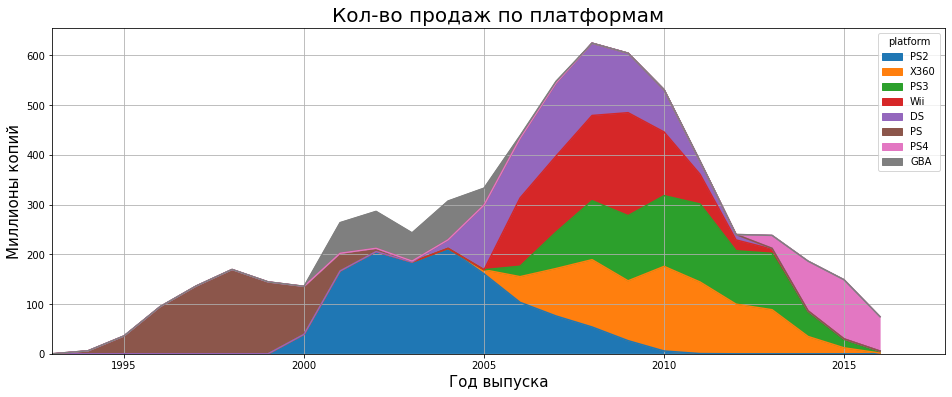

In [24]:
platform_top_sale.plot.area(figsize=(16,6))
plt.xlim(left=1993)

plt.title('Кол-во продаж по платформам',fontsize = 20)
plt.ylabel('Миллионы копий',fontsize = 15)
plt.xlabel('Год выпуска',fontsize = 15)
plt.grid()

Видим рост всей игровой индустрии до 2007 года, после пика идет явный спад и даже появление новых платформ не сильно влияет на общее снижение продаж

Характерный срок появления новых и исчезания старых платформ составляет примерно 10-8 лет, чаще всего 5 лет из них самые активные по продажам

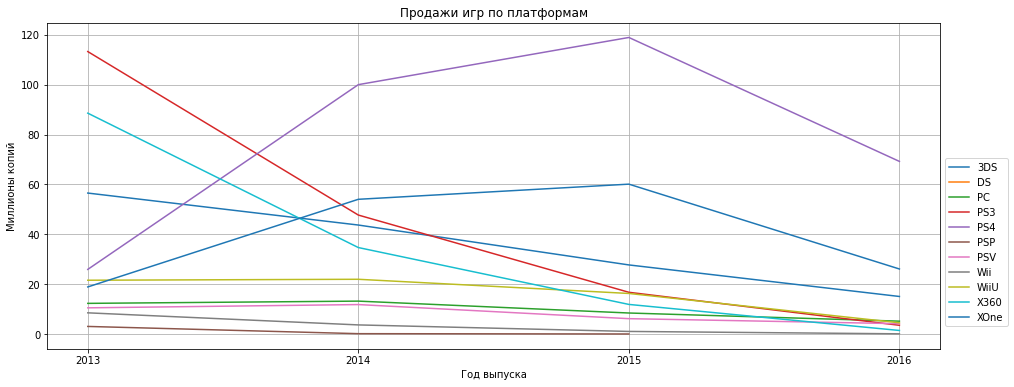

In [25]:
actual_data = data.query('year_of_release >= 2013')
actual_sale = actual_data.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum')

plt.figure(figsize=(16,6))

plt.plot(actual_sale.index, actual_sale)

plt.title('Продажи игр по платформам')

plt.ylabel('Миллионы копий')
plt.xlabel('Год выпуска')
plt.legend(actual_sale,bbox_to_anchor=(1, 0.6))
plt.grid()

plt.xticks([2013,2014, 2015, 2016])
plt.show()

<Figure size 1152x432 with 0 Axes>

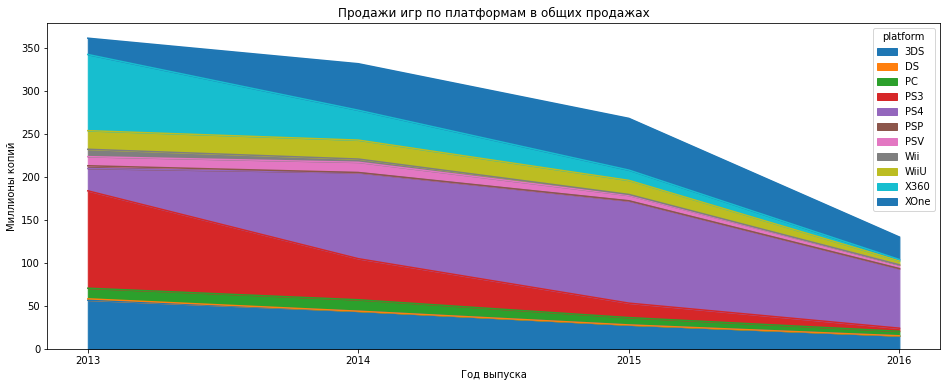

In [26]:
plt.figure(figsize=(16,6))
actual_sale.plot.area(figsize=(16,6))
plt.xticks([2014, 2015, 2016])
plt.title('Продажи игр по платформам в общих продажах')
plt.ylabel('Миллионы копий')
plt.xlabel('Год выпуска')

plt.xticks([2013,2014, 2015, 2016])
plt.show()

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.

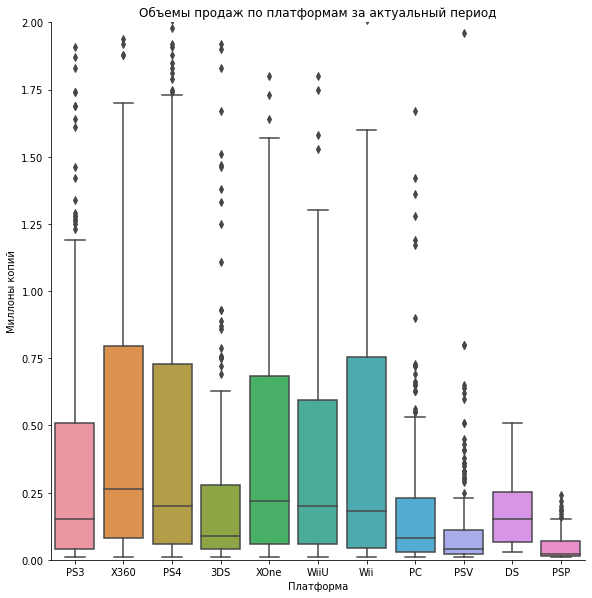

In [27]:
sns.catplot(x="platform", 
            y='total_sales', 
            kind="box", 
            data=actual_data, 
            orient='v',
            height=8)
plt.title('Объемы продаж по платформам за актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Миллоны копий')
plt.ylim(0, 2);

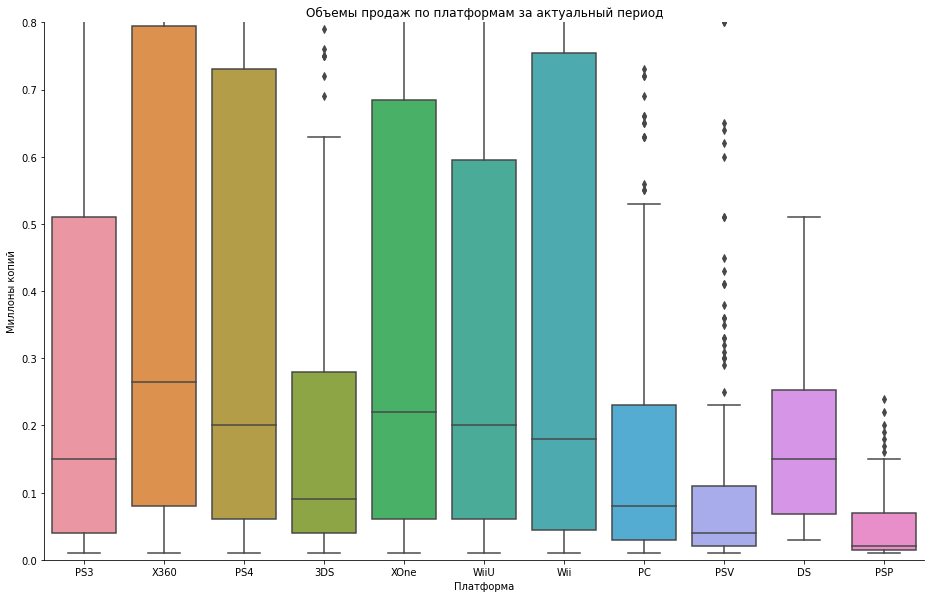

In [28]:
sns.catplot(x="platform", 
            y='total_sales', 
            kind="box", 
            data=actual_data, 
            orient='v',
            height=8,
            aspect=1.6)
plt.title('Объемы продаж по платформам за актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Миллоны копий')
plt.ylim(0, 0.8);

In [29]:
data['total_sales'].describe()

count    16442.000000
mean         0.536083
std          1.558871
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

В среднем продажи игр не достигают миллиона копий. При этом есть явные выбросы - бестселлеры с миллионными продажами. Особо отличаются игры на PS4, X360 и Wii

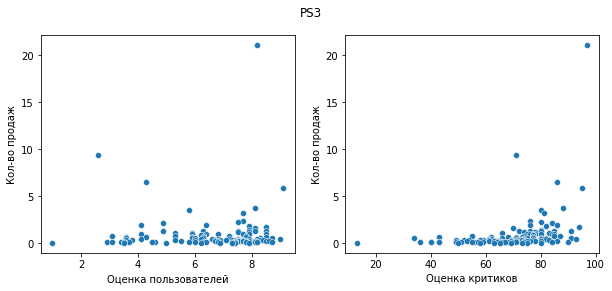

Корреляция между оценкой пользователей и продажами 0.02269094327112414
Корреляция между оценкой критиков и продажами 0.33380663565061736


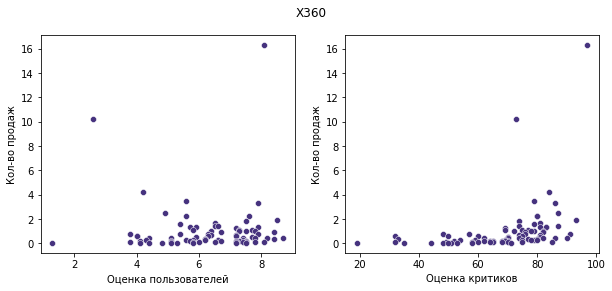

Корреляция между оценкой пользователей и продажами -0.006238179532306317
Корреляция между оценкой критиков и продажами 0.3503445460228664


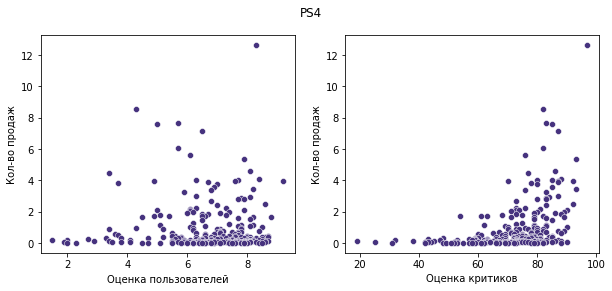

Корреляция между оценкой пользователей и продажами -0.03362497596528878
Корреляция между оценкой критиков и продажами 0.40589480145836687


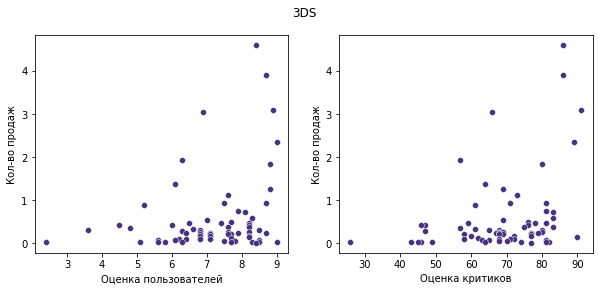

Корреляция между оценкой пользователей и продажами 0.2729904366942444
Корреляция между оценкой критиков и продажами 0.3392349287853147


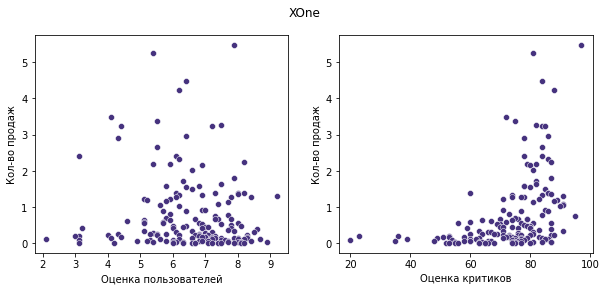

Корреляция между оценкой пользователей и продажами -0.09400318326920852
Корреляция между оценкой критиков и продажами 0.41042203561296375


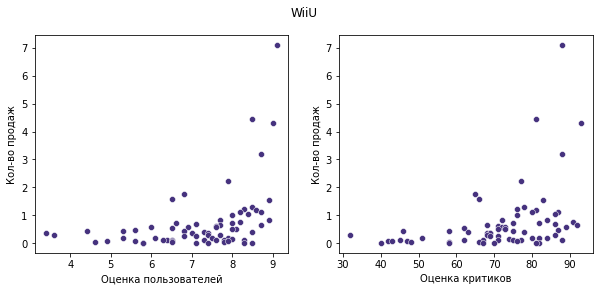

Корреляция между оценкой пользователей и продажами 0.40869174384926477
Корреляция между оценкой критиков и продажами 0.37950449899784144


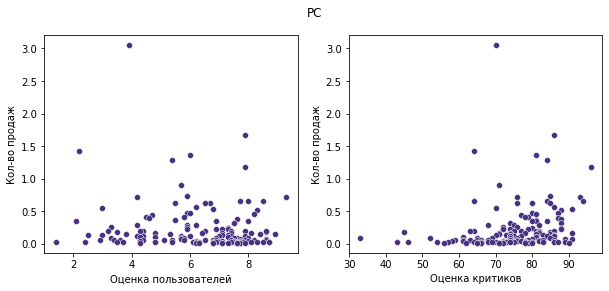

Корреляция между оценкой пользователей и продажами -0.10923502736171779
Корреляция между оценкой критиков и продажами 0.19412407903472956


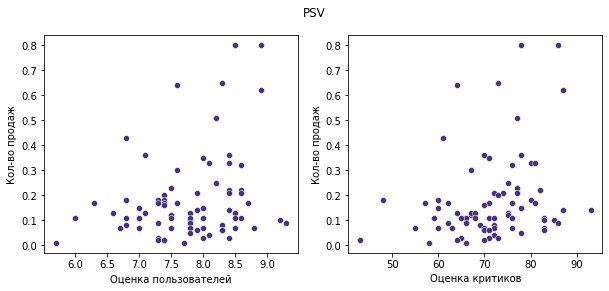

Корреляция между оценкой пользователей и продажами 0.2654782720509426
Корреляция между оценкой критиков и продажами 0.2540997021864078


In [30]:
a_data = data.query('year_of_release >= 2013 and user_score !=0 and critic_score !=0')

def critic_range(name_platform):
    platform = a_data[a_data['platform']==name_platform]
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.set_palette('viridis')
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=axes[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=axes[1])
    fig.suptitle(name_platform)
    axes[0].set(xlabel='Оценка пользователей')
    axes[1].set(xlabel='Оценка критиков')
    axes[0].set(ylabel='Кол-во продаж')
    axes[1].set(ylabel='Кол-во продаж')
    plt.show();
    
    user_corr = platform['user_score'].corr(platform['total_sales'])
    critic_corr = platform['critic_score'].corr(platform['total_sales'])
    print('Корреляция между оценкой пользователей и продажами', user_corr)
    print('Корреляция между оценкой критиков и продажами', critic_corr)
    
list_platforms = ['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV']
for platform in list_platforms:
    critic_range(platform)  

Оценки пользователей не имеют корреляции с продожами, а оценки критиков демонстрируют средне-слабую корреляцию с "цифрами" продаж.

Лидеры по корреляция между оценкой критиков и продажами: X360, PS4 и XOne

Лидеры по корреляция между оценкой пользователей и продажами: 3DS, PSV и WiiU

###  Распределение игр по жанрам

In [31]:
top_platform = (actual_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)
data_top = actual_data.query('platform in @top_platform.platform')


genre_data = (data_top
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)

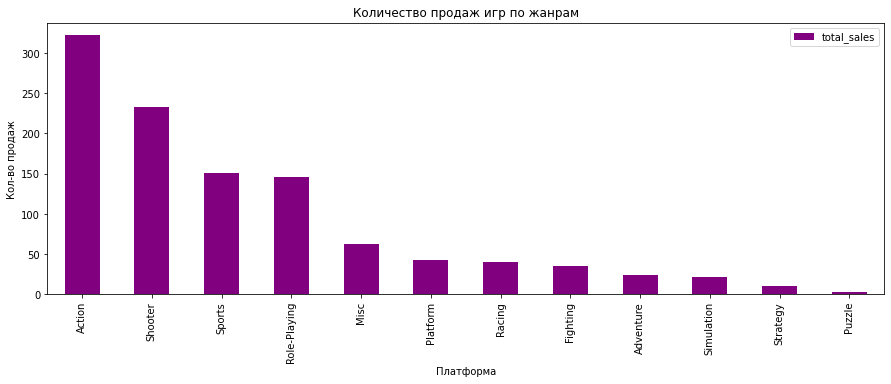

In [32]:
(data_top
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', color= 'purple', legend=True, figsize=(15, 5))
)

plt.title('Количество продаж игр по жанрам')
plt.xlabel('Платформа')
plt.ylabel('Кол-во продаж')

plt.show()

Больше всего выпускаются и соотвественнно больше продаются игры жанра action. Игры жанра puzzle показывают наихудший результат

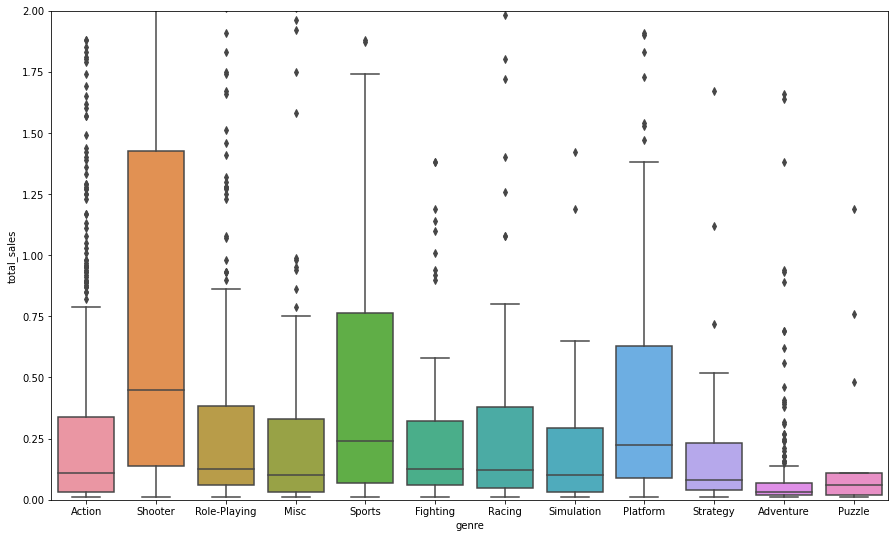

In [33]:
plt.figure(figsize=(15,9))

sns.boxplot(x='genre', y='total_sales', data=data_top)
plt.ylim(0, 2)
plt.show()

Лидирующие жанры по медианным значениям являются: shooter, sports и platform

При этом данные жанры демонстрируют топовые игры по продажам, большой массив второго и третьего квартиля - что говорит о успешности. Жанр action с трудом входит в пятерку

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [34]:
na_sales = actual_data.groupby('platform',as_index=False)['na_sales'].sum().nlargest(5, 'na_sales')
eu_sales = actual_data.groupby('platform',as_index=False)['eu_sales'].sum().nlargest(5, 'eu_sales')
jp_sales = actual_data.groupby('platform',as_index=False)['jp_sales'].sum().nlargest(5, 'jp_sales')

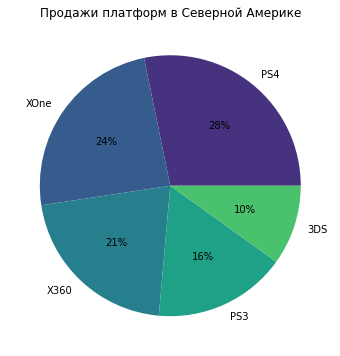

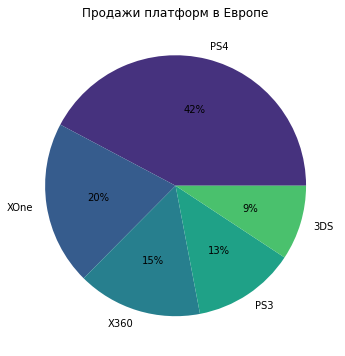

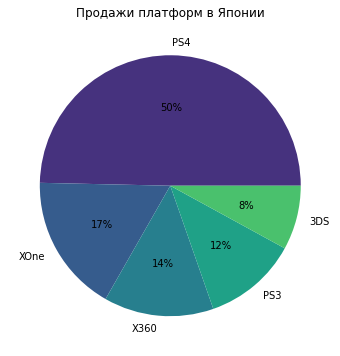

In [35]:
na_sales.plot(kind='pie',y="na_sales", autopct='%1.0f%%', legend=False, labels=na_sales['platform'],
              title = "Продажи платформ в Северной Америке", figsize=(6,6),ylabel='');
eu_sales.plot(kind='pie',y="eu_sales", autopct='%1.0f%%', legend=False,  labels=na_sales['platform'],
              title = "Продажи платформ в Европе", figsize=(6,6),ylabel='');
jp_sales.plot(kind='pie',y="jp_sales", autopct='%1.0f%%', legend=False,  labels=na_sales['platform'],
              title = "Продажи платформ в Японии", figsize=(6,6),ylabel='');

Самой популярной платормой во всех 3 регионах является PS4, но в Японии на нее приходится 50%, а в Северной Америке 28% и в Европе 42%. Распределение может быть связано со страной происхождения платформы которые представлены всего 2 странами США и Японией

Соответственно в Японии большую долю занимают Sony(PS3,PS4), Nintendo(3DS) - 70% рынка и Microsoft(X360,XOne) - 30% рынка. А в Северной Америке Microsoft - 45% рынка и 55% Sony, Nintendo

### Самые популярные жанры (топ-5)

In [36]:
na_genres = actual_data.groupby('genre',as_index=False)['na_sales'].sum().nlargest(5, 'na_sales')
eu_genres = actual_data.groupby('genre',as_index=False)['eu_sales'].sum().nlargest(5, 'eu_sales')
jp_genres = actual_data.groupby('genre',as_index=False)['jp_sales'].sum().nlargest(5, 'jp_sales')

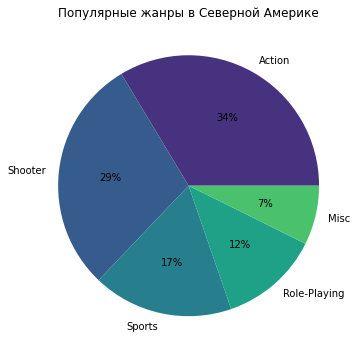

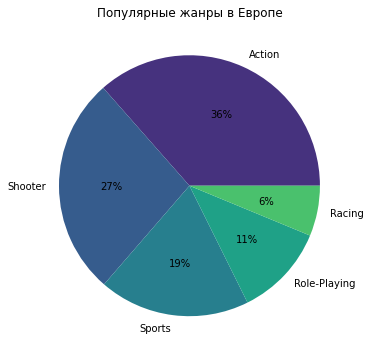

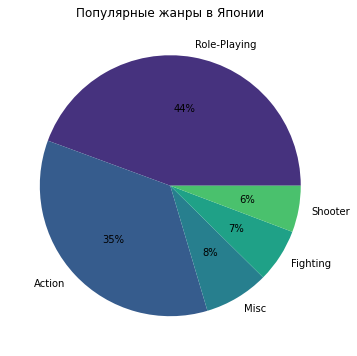

In [37]:
na_genres.plot(kind='pie',y="na_sales", autopct='%1.0f%%', legend=False, labels=na_genres['genre'],
              title = "Популярные жанры в Северной Америке", figsize=(6,6),ylabel='');
eu_genres.plot(kind='pie',y="eu_sales", autopct='%1.0f%%', legend=False, labels=eu_genres['genre'],
              title = "Популярные жанры в Европе", figsize=(6,6),ylabel='');
jp_genres.plot(kind='pie',y="jp_sales", autopct='%1.0f%%', legend=False, labels=jp_genres['genre'],
              title = "Популярные жанры в Японии", figsize=(6,6),ylabel='');

По жанрам Северная Америка не сильно отличается от Европы. На первом месте Action 34% и 36%. На втором Shooter 29% и 27%

В Японии на первом месте Role-Playing 44% и только на втором месте Action 35%, скорее всего такая разница связана с разным менталитетом или предпочтениями

### Влияение рейтинга ESRB на продажи в отдельном регионе

In [38]:
na_rating = actual_data.groupby('rating',as_index=False)['na_sales'].sum()
eu_rating = actual_data.groupby('rating',as_index=False)['eu_sales'].sum()
jp_rating = actual_data.groupby('rating',as_index=False)['jp_sales'].sum()

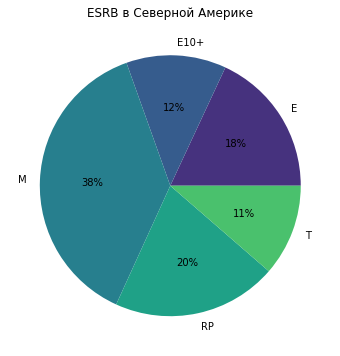

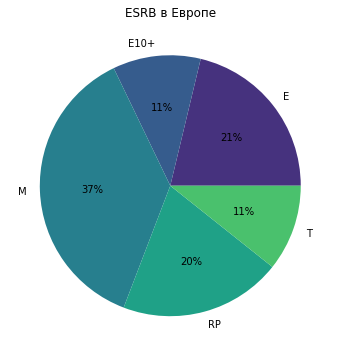

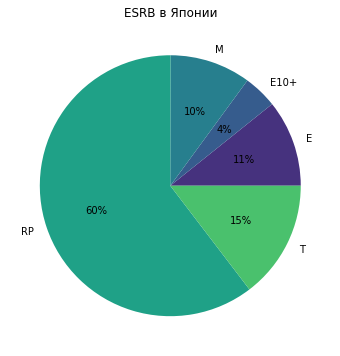

In [39]:
na_rating.plot(kind='pie',y="na_sales", autopct='%1.0f%%', legend=False, labels=na_rating['rating'],
               title = "ESRB в Северной Америке", figsize=(6,6),ylabel='');
eu_rating.plot(kind='pie',y="eu_sales", autopct='%1.0f%%', legend=False, labels=eu_rating['rating'],
               title = "ESRB в Европе", figsize=(6,6),ylabel='');
jp_rating.plot(kind='pie',y="jp_sales", autopct='%1.0f%%', legend=False, labels=jp_rating['rating'],
               title = "ESRB в Японии", figsize=(6,6),ylabel='');

Доля рейтингов у Европы и Северной Америки мало различаются. На первом месте рейтинг «M» («Mature») — «Для взрослых», что соответствует популярным жанрам Action и Shooter

В Японии около 60% игр вообще не имеют рейтинга, поскольку ESRB не является обязательным и принадлежит Северной Америке, возможно, там своя система рейтингов

## Проверка гипотез
### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:

    Нулевая гипотеза H₀: средние пользовательские рейтинги платформ Xbox One и PC не различаются
    Альтернативная гипотеза H₁: средние пользовательские рейтинги платформ Xbox One и PC различаются

Уровень значимости устанавливаем α = 5%, как общепринятое пороговое значение

In [40]:
xone = actual_data.query('platform == "XOne" and user_score > 0')
pc = actual_data.query('platform == "PC" and user_score > 0')

In [41]:
print('Средний пользовательский рейтинг Xbox One:',xone['user_score'].mean())
print('Средний пользовательский рейтинг PC:',pc['user_score'].mean())

Средний пользовательский рейтинг Xbox One: 6.521428571428572
Средний пользовательский рейтинг PC: 6.2696774193548395


In [42]:
alpha = .05

results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


### Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем гипотезы:

    Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports не различаются
    Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

Уровень значимости устанавливаем α = 5%, как общепринятое пороговое значение.

In [43]:
action = actual_data.query('genre == "Action" and user_score > 0')
sports = actual_data.query('genre == "Sports" and user_score > 0')

In [44]:
print('Средний пользовательский рейтинг Action:',action['user_score'].mean())
print('Средний пользовательский рейтинг Sports:',sports['user_score'].mean())

Средний пользовательский рейтинг Action: 6.837532133676092
Средний пользовательский рейтинг Sports: 5.238124999999999


In [45]:
alpha = .05

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.4460039700704315e-20
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC одинаковые и Средние пользовательские рейтинги жанров Action и Sports разные

# Общий вывод

    ● Нам были предоставлени данные по выпуску и продаже игр за период 1980-2016 годы. Пик выпуска новых игр приходится на 2008, 2009 годы. Пик продаж игр так же приходится на 2008 и 2009 годы. Далее мы видим снижение и выпуска и продаж. Что связано с появлением и развитием мобильных игр

    ● Самыми продаваемыми игровыми платформами за все время являются PS2, X360 и Wii, которые в свою очередь были заменены своими приемниками

    ● На всем изучаемом периоде количество игровых платформ менялось. Средняя продолжительность жизни игровой платформы 8 лет. Последний пик роста количества игровых платформ приходится на 2013 год и составил 11 платформ, затем идет снижение. Актуальными на 2016 год осталось 9 платформ. Из которых на 3 платформы приходится 84,4% продаж PS4(51.1%), XOne(20.7%), 3DS(12.6%). Указанные платформы являютя приемниками PS3, X360 и DS

    ● Самыми популярными по продажам являются игры жанров Action(29,3%), Shooter(21,0%) и Sports(13.5%)

    ● На продажи игр в небольшой степени влияют оценки критиков и абсолютно не влияют оценки игроков

    ● При планировании продаж на 2017 год, необходимо ориентироваться на игровые платформы PS4 и XOne как самые молодые платформы находящиеся в средение своего жизненного цикла

    ● Соответственно для Японии более актуально продукция Sony(PS3, PS4) И Nintendo(Wii) для Северной Америки Microsoft(X360,XOne)

    ● В северной Америке и Европе следует обращать внимание на игры в жанрах Action или Shooter. В Японии RPG. Влияние на итоговые продажи могут оказать оценки критиков. Оценки игроков таким влиянием не обладают

В целом можно сказать, что по аналогии с 2016 годом можно ожидать 2 кратное падение продаж. Поскольку выпуск новых игр снижается как и их продажи, поэтому стоит задуматься о сокращении затрат исходя из планируемого сокращения продаж